# Name Classification with Naive Bayes

## Overview

Focus of this project is to build a python module, that can determine where a person is from, based on their name string. 
Final product is a class file containing `NameClassifier` class, capable of 
- loading & preprocessing train and test data
- train the model
- predict and evaluate the model
- save & load trained model for future use

The data of name strings with various origin from the world was obtained by using [Faker](https://faker.readthedocs.io/en/latest/index.html) library in python. 100000 fake names were created for each class for training and testing purposes. 

## Libraries / Dependencies

Couple python libraries were used to build this class
- scikit-learn
- pandas
- pickle

Also Faker for data creation.
In order to use the class, these libraries and their dependencies need to be installed on your system.

## Setup and Locations

This class is only tested on Ubuntu Linux 18.04 version, and can be used by importing the class. The class file `model.py` needs to be located in the directory where you intend to use it. Data and saved model file can be located anywhere, as long as you have relative path to them from the class file. However generally it's good idea to keep everything within same or its child's directory. 

Now the basics are all out of the way, let's get started!

## Taking a look at data

This module load in the name data as csv file using pandas. You should have separate csv files, each for Japanese and non-Japanese names. 

In a file, this would look like

>code, Address, name, other col..<br>
, value2, John Smith, value4

**As long as there is a column named `name` with the name data, other columns can also be present.<br> 
There should always be a white space between first and last name, since the model breaks down into first and last name, and analyze them.**

For example, using dataframe, the data might look like

In [2]:
import pandas as pd
names = pd.read_csv('data/multi_class.csv')

print('Name data:\n', names.sampleple(10))

Name data:
                       code                           name
59246            Norwegian                 Reidun Isaksen
62130  Portuguese (Brazil)              Luiz Miguel Alves
93726      Chinese (China)                           杨 金凤
66257  Portuguese (Brazil)                  Rebeca da Luz
6104        Arabic (Egypt)              Carlos Walker DDS
81490             Japanese                          津田 和也
86103             Japanese                           近藤 翼
79181              Russian      Лапин Христофор Борисович
76114              Russian  Громова Маргарита Анатольевна
85459             Japanese                          井高 康弘


## Preprocessing

Preprocessing of data is one of the most important aspect of machine learing. It can boost or ruin the models' performance. 
Here, since we're dealing with text data, it needs to be encoded into numbers. 

### Spliting Dataset
The dataset is splitted into train and test datasets, for model training and testing.
Default ratio is set to 
> train : test = 70% : 30%

This ratio can be modified if necessary.

### Label Encoding

Since the each labels are countrys' name strings, these need to be encoded into integers. Here we are experimenting with 10 countries, so each countries will be mapped into integers between 0~10.

We use `NameClassifier.load_data()` method to load the data and split them into 2 dataset like this...





In [22]:
## import the class
from model import NameClassifier

clf = NameClassifier()
xtrain, xtest, ytrain, ytest = clf.load_data('data/multi_class.csv')
print('name data type:{}\n{}'.format(type(xtrain), xtrain.sample(10)))
print('\nLabels: {}, type:{}'.format(ytrain, type(ytrain)))

name data type:<class 'pandas.core.series.Series'>
56865                      Einar Thorsen
9879                  Christopher Garner
15028                    Timothy Hill MD
2390                     Timothy Hendrix
16800                       Martin Huber
48932                               심 영환
35943    Nicolas Le Gall de la Goncalves
37783                    Alfred Descamps
43191                               김 혜진
17454                    Cathy Middleton
Name: name, dtype: object

Labels: [9. 8. 7. ... 0. 8. 4.], type:<class 'numpy.ndarray'>


## Bag of Words Model
In this simple technique, each word that appears in the dataset are assigned with unique number, so that each text can be expressed as a sequence of the numbers.
The sequences are converted into vector with each position / index representing each word, and value expressing the frequency of the occurence of the word.

<br>
Specifically in this class, word count is utilized with scikit-learn's `CountVectorizer`. 

<br>
The data will be encoded into numpy sparse matrix, and is ready to be fed into the Naive Bayes model
<br>

Also, this class is implemented using Naive Bayes algorithm, using `Sklearn.naive_bayes.MultinomialNB` class.

Encoding names with word count and traning naive bayes are done in `NameClassifer.train()` method, lile...



In [23]:
# then start training with the training data
clf.train(xtrain, ytrain)

Fitting the vectorizer and training the model...
training completed!


## Evaluation Metrics

Model evaluation was done by testset, with 3 metrics.
### accuracy
how many data points did the model correclty predicted, regardless of class

$$acc = \frac{TP + TN}{Total Data}$$

### Confusion Matrix

Confusion matrix visualizes how a model predicts predicts data on each to which class.
You can gain information about which classes are hard to predict, as well as how the model is 'confused' to classify certain class.

This module equipped with confusion matrix and evaluation method. 

accuracy: 82.95%


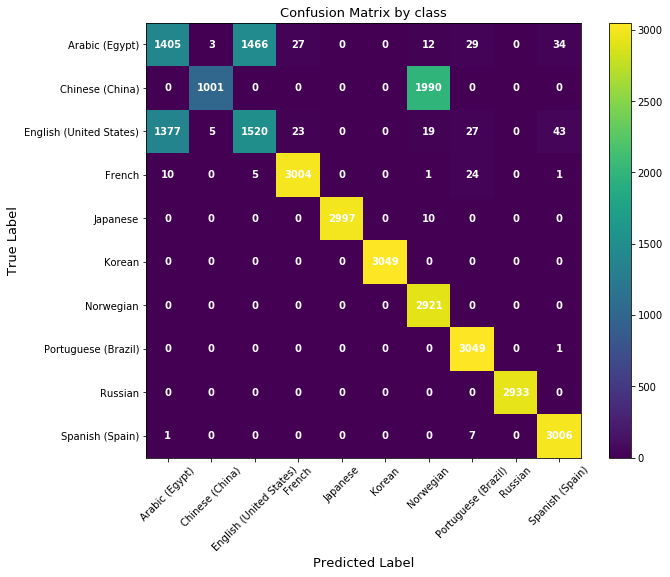

In [24]:
# Getting the accuracy with test data first.
metrics = clf.evaluate(xtest, ytest)
print('accuracy: {}%'.format(metrics*100))

# now plot a confusion matrix
pred = clf.predict(xtest)
clf.plot_confusion(ytest, pred)

From the matrix, we can see few things, such as ..
- Arabic and English names are confusing to distinguish 
- It can predict Norwegian name as it is, but somehow classify some Chinese name as Norwagian.(why?? lol)
- Other than that, model is performing pretty okay.

Now Let's take a look at the trianing data for English and Egyptian names.

In [52]:
## Peek into the training data
df = pd.read_csv('data/multi_class.csv')
Eg, US = df['code'].unique()[0], df['code'].unique()[1]
print('Egyptian:\n', df[df['code'] == Eg].head(5))
print('\nAmerican:\n', df[df['code'] == US].head(5))

Egyptian:
              code              name
0  Arabic (Egypt)       Adam Rogers
1  Arabic (Egypt)     Sandra Garcia
2  Arabic (Egypt)  Anthony Mcdonald
3  Arabic (Egypt)      Jordan Cohen
4  Arabic (Egypt)       Cody Wilson

American:
                           code           name
10000  English (United States)   Ashley Scott
10001  English (United States)    Betty Smith
10002  English (United States)   Dylan Harris
10003  English (United States)  Andrew Vargas
10004  English (United States)  Jillian Lewis


You can see that they're very similar, or almost identical. 

## Prediction

Now let us predict some fake names, using the trained model. This can be done through `NameClassifier.predict()` method, and it accept python list of name strings. <br>
Let's take a look.

In [28]:
some_names = ['渡辺　謙', '木村　拓哉', 'Jack Nicholson', 'John Smith', ' 陳　港生']
# Only the first 2 are Japanese name, so output should look like [1,1,0,0]
pred = clf.predict(some_names, label_str=True)
print(pred)

['Japanese' 'Japanese' 'Arabic (Egypt)' 'Arabic (Egypt)' 'Norwegian']


Looks like it's having trouble with Chinese characters there!


### What about unseen names?


Here, let's try to predict with names that were not existing in the training dataset, such as
- unseen last / first names
- Japanese Names in roman
- non-Japanese names in Katakana

In [32]:
# First we'll get word_dictionary that are based on model's training data
trained_dict = clf.get_word_dict()
print('安倍' in trained_dict.keys())
print('晋三' in trained_dict.keys())

print('\nSo the name 安倍　晋三 is was not present in the training set.\nLet us try along with Katakana name.')
pred_anom = clf.predict(['安倍　晋三', 'ジェニファー　ローレンス', 'Jennifer Lawrence'], label_str=True)
print(pred_anom)

False
False

So the name 安倍　晋三 is was not present in the training set.
Let us try along with Katakana name.
['Norwegian' 'Norwegian' 'Arabic (Egypt)']


As you can see, model fails to classify Japanese name, American and American name in Japanese Katakana letters.

Possible improvement would be to 
- add more varieties to the training data
- different ML algorithm

## Saving and Loading the Model

- Saving the trained model is easy, just use `NameClassifier.save_model()`
- Loading can be done by `NameClassifier.load_model()`

Both methods accept `path/to/modelFile/fileName.pickle` as argument.

In [34]:
clf.save_model('saved_model.pickle')
trained_model = NameClassifier.load_model('saved_model.pickle')
print(type(trained_model))

loading the model
<class 'model.NameClassifier'>


## To do / future features

- document the code better
- Multi class classification of names for nationalities/origins
    * **Unkown country support**
- trying out with different algorithms, such as 
    - Neural nets (RNN?)
    - random forest
    - SVM
- input the names as image data, and use CNN to train it